In [165]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./Titanic.py
./Project_1.ipynb
./.ipynb_checkpoints/README-checkpoint.md
./.ipynb_checkpoints/Project_1-checkpoint.ipynb
./.ipynb_checkpoints/Titanic-checkpoint.py
./data/titanic.csv
./data/.ipynb_checkpoints/titanic-checkpoint.csv


# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [ ]:
"""In this porject, you must predict what features contributed the most the passenger's
survival on the Titanic and create an ML model predicting the survivability of the
passenger. The program must be written in Python and use Kaggle's
Titanic - Machine Learning from Disaster datasets."""

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score
import matplotlib.pyplot as plt
import numpy as np

""" I received this data from the Kaggle Titanic - Machine Learning from Disaster training
data set called titanic.csv."""
df = pd.read_csv('data/titanic.csv', skiprows=2)
df.columns = ['PassengerId', 'Survival', 'Pclass', 'Name', 'Sex', 'Age', 
              'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

In [73]:
"""I believe some of the data columns are not helpful to determining what contributed to their
survival, and as such can be eleimnated to improve run time and performance. My bias is that I
believe women and children should have been prioritized at the time of the sinking."""

'I believe some of the data columns are not helpful to determining what contributed to their\nsurvival, and as such can be eleimnated to improve run time and performance. My bias is that I\nbelieve women and children should have been prioritized at the time of the sinking.'

# 4.Prepare the Data


Apply any data transformations and explain what and why


/tmp/ipykernel_1355462/3396824125.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'female': 1, 'male': 0})


   Survival  Pclass  Sex   Age  SibSp  Parch
0         1       3    1  26.0      0      0
1         1       1    1  35.0      1      0
2         0       3    0  35.0      0      0
4         0       1    0  54.0      0      0
5         0       3    0   2.0      3      1
Pclass


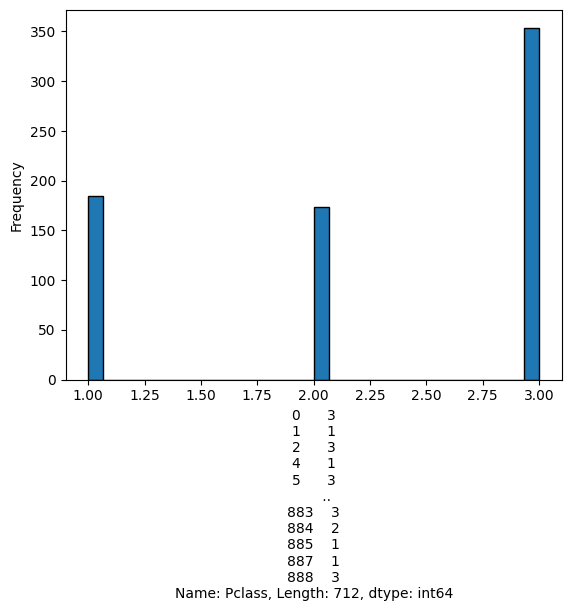

Sex


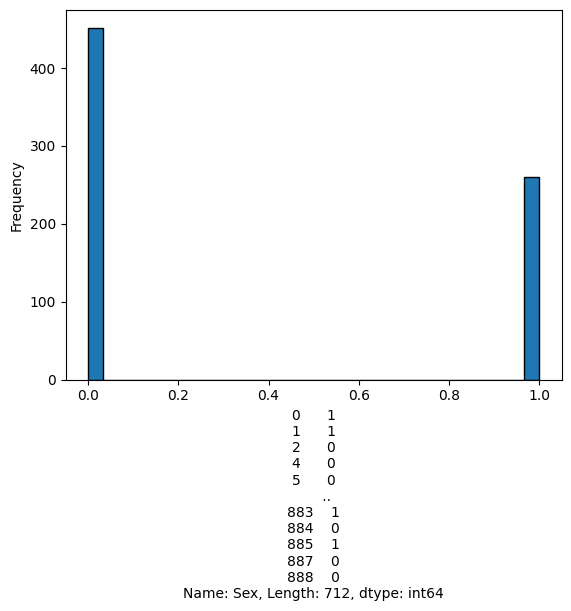

Age


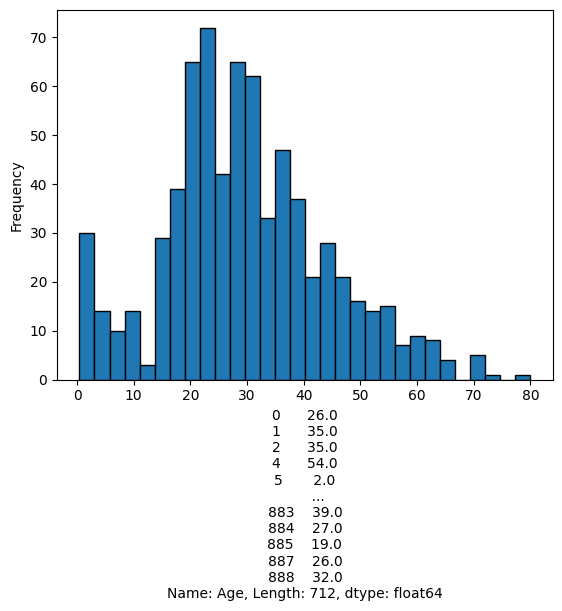

SibSp


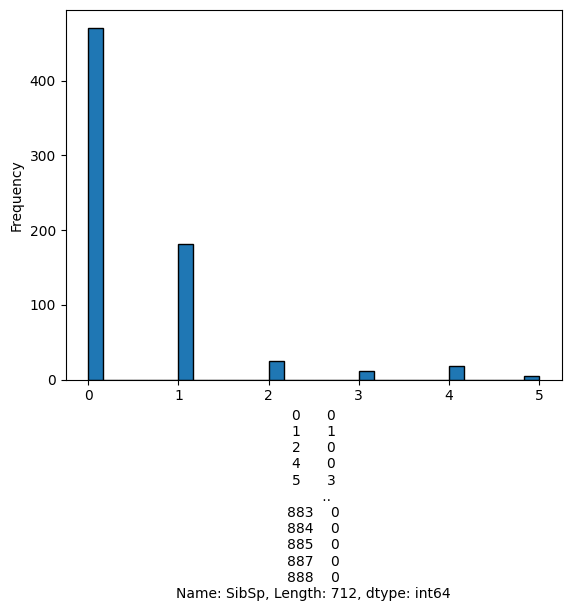

Parch


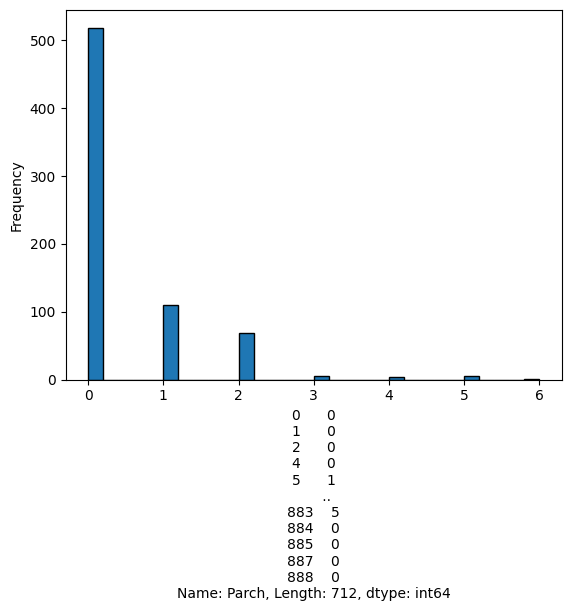

In [167]:

# These columns are nonessential and as such can be removed to increase performance and runtime.
df = df.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin','Embarked'])

# Dropping all rows with none value as it can skew performance
df = df.dropna()

# Trying to hot encode since female and male are strings and this type
# cannot be supported
df['Sex']=df['Sex'].replace({'female': 1, 'male': 0})
print(df.head())

for i in df.columns[1:]:
    print(i)
    X = df[i]
    survivors = df["Survival"]

    plt.hist(X,bins=30,edgecolor='black')
    plt.xlabel(X)
    plt.ylabel('Frequency')
    plt.show()


# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [168]:
def inference(nestimators, crit, rand_state, njobs):
    target = 'Survival'
    features = df.columns[df.columns!=target]
    X = df[features].values
    y = df[target].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
    
    # Chose Random Forest Classifier because features and survivability
    # are nonlinear and this can support, also it
    # can provide feature importance which is what we need to determine
    # the most crucial factor in survival.
    forest = RandomForestClassifier(
        n_estimators = nestimators,
        criterion=crit,
        random_state=rand_state,
        n_jobs=njobs)
    forest.fit(X_train,y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    
    # about 92% train accuracy 82% test accuracy
    print("Train accuracy:", accuracy_score(y_train,y_train_pred))
    print("Test accuracy:", accuracy_score(y_test,y_test_pred))
    
    # Age is the most important feature
    feature_importances = forest.feature_importances_
    features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    features_df = features_df.sort_values(by='Importance', ascending=False)
    print("\n",features_df)


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [151]:
# Before, i would simply remove all rows that have NaN values instead. Now, I want to see
#what will happen if I use mean imputation instead to fine tune my model, since removing the
# rows can get rid of lots of valuable data. Somehow, this made my accuracy
# worse. Here is the code below.

"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score
import matplotlib.pyplot as plt
import numpy as np

#I received this data from the Kaggle Titanic - Machine Learning from Disaster training
#data set called titanic.csv.
df = pd.read_csv('data/titanic.csv', skiprows=2)
df.columns = ['PassengerId', 'Survival', 'Pclass', 'Name', 'Sex', 'Age', 
              'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


# These columns are nonessential and as such can be removed to increase performance and runtime.
df = df.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin','Embarked'])


# Trying to hot encode since female and male are strings and this type
# cannot be supported
df['Sex']=df['Sex'].replace({'female': 1, 'male': 0})

# Fill in all NaN values with mean imputaton of the column
df = df.fillna(df.mean())

print(df.head(),"\n")
def inference(nestimators, crit, rand_state, njobs):
    target = 'Survival'
    features = df.columns[df.columns!=target]
    X = df[features].values
    y = df[target].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
    
    # Chose Random Forest Classifier because features and survivability
    # are nonlinear and this can support, also it
    # can provide feature importance which is what we need to determine
    # the most crucial factor in survival.
    forest = RandomForestClassifier(
        n_estimators = nestimators,
        criterion=crit,
        random_state=rand_state,
        n_jobs=njobs)
    forest.fit(X_train,y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    
    # about 92% train accuracy 82% test accuracy
    print("Train accuracy:", accuracy_score(y_train,y_train_pred))
    print("Test accuracy:", accuracy_score(y_test,y_test_pred))
    
    # Age is the most important feature
    feature_importances = forest.feature_importances_
    features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    features_df = features_df.sort_values(by='Importance', ascending=False)
    print("\n",features_df)"""


   Survival  Pclass  Sex        Age  SibSp  Parch
0         1       3    1  26.000000      0      0
1         1       1    1  35.000000      1      0
2         0       3    0  35.000000      0      0
3         0       3    0  29.698272      0      0
4         0       1    0  54.000000      0      0 



/tmp/ipykernel_1355462/228697166.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'female': 1, 'male': 0})


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


In [ ]:
""" In summary, my program was abler to predict
survivability of passengers with a 93% accuracy on
training data and an 84% accuracy on the testing
data. This was achieved by removing NaN values and
one hot encoding certain non-int features such as Sex. I then
ran a Random Forest Classifier on the x-values
against the target of the Survival features. I chose this
model for its ability use
decision trees to handle multiple features, which is what
we need for this complex dataset. It can also show feature importance.
In this project, I learned how to do one hot encoding and use a Random Forest
Classifier algorithm from the scikit-learn library. I also learned
how to identify feature importance of RFCs."""

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [169]:
inference(1000, "gini", 1, -1) 

Train accuracy: 0.9397590361445783
Test accuracy: 0.8271028037383178

   Feature  Importance
2     Age    0.421313
1     Sex    0.302996
0  Pclass    0.154691
3   SibSp    0.068679
4   Parch    0.052321
